## Neural Network Gas Turbine

In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
import pandas as pd
import numpy as np
import sklearn

In [5]:
gt = pd.read_csv("gas_turbines.csv")
gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# EDA

In [6]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
gt.shape

(15039, 11)

In [8]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
gt.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

#### Handling missing value

In [10]:
gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### Handling Duplicate records

In [11]:
# check for duplicate data
duplicate = gt.duplicated()
print(duplicate.sum())
gt[duplicate]

0


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### VISUALISATION

VISUALIZING BY BOXPLOT

AT


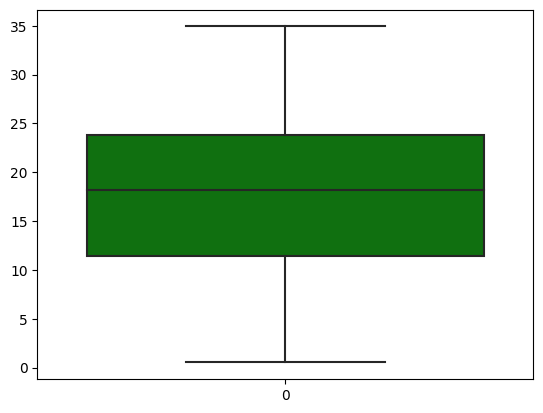

AP


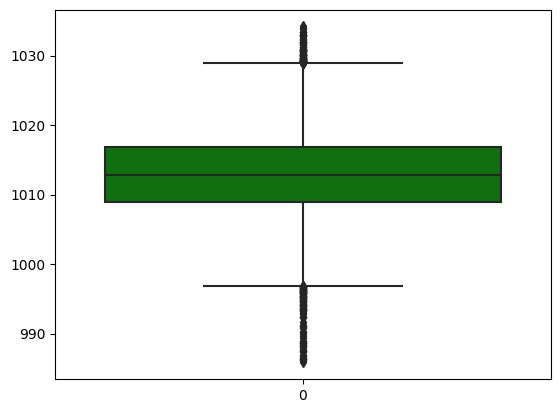

AH


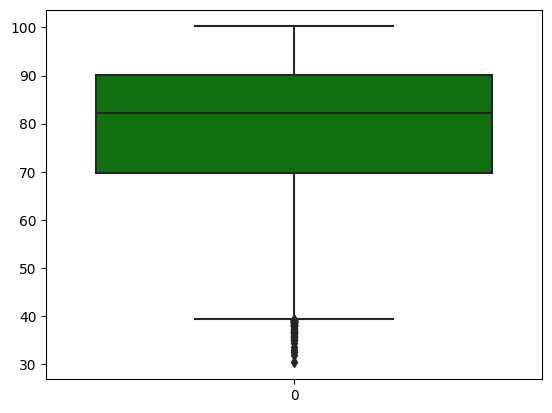

AFDP


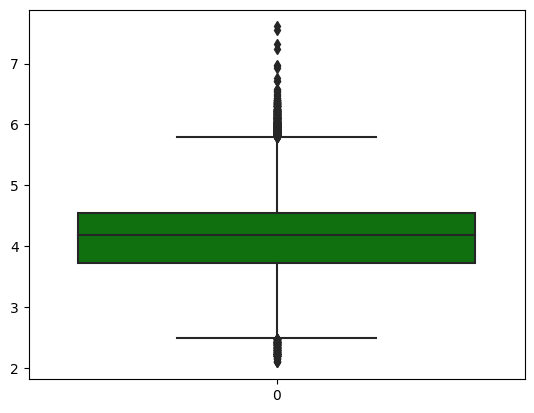

GTEP


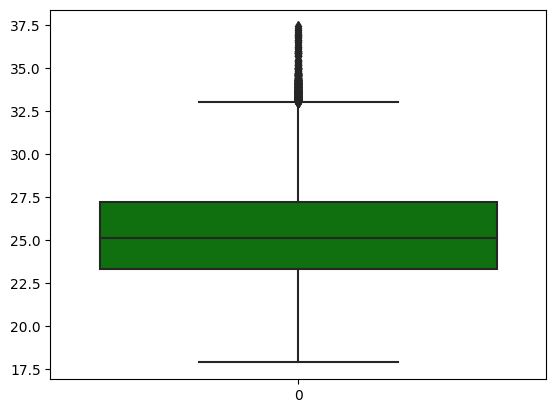

TIT


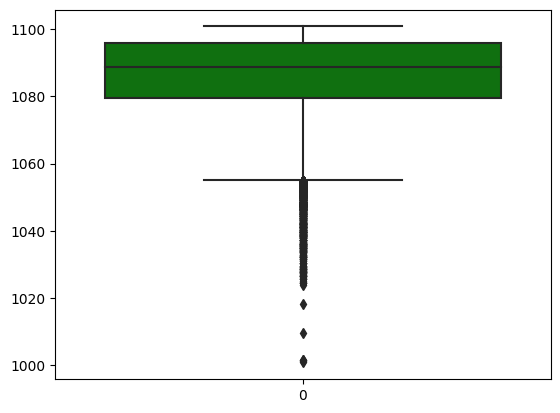

TAT


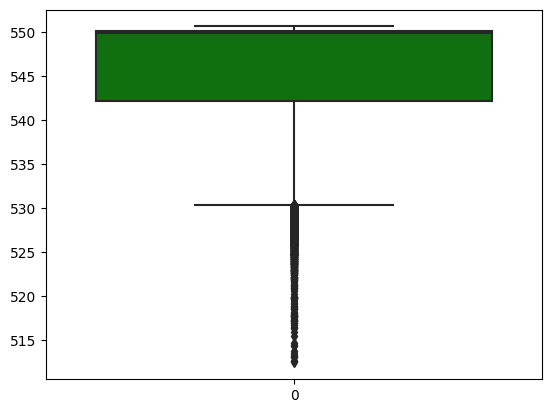

TEY


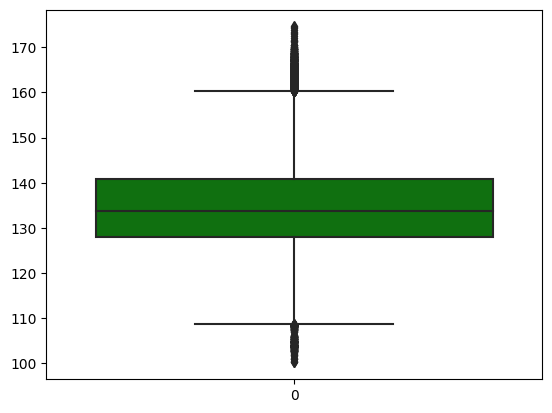

CDP


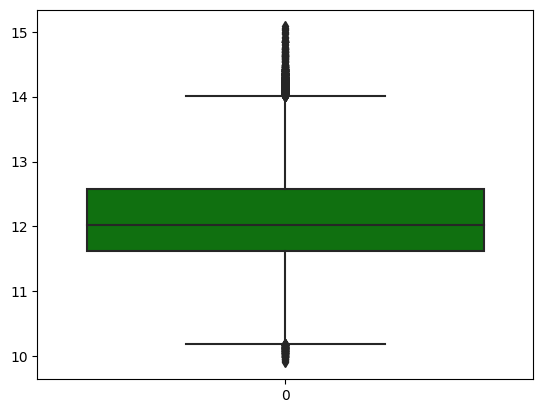

CO


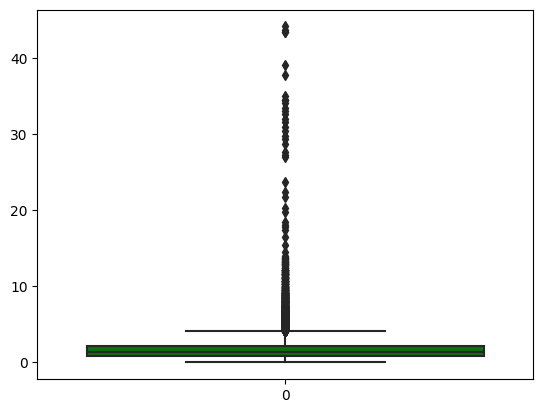

NOX


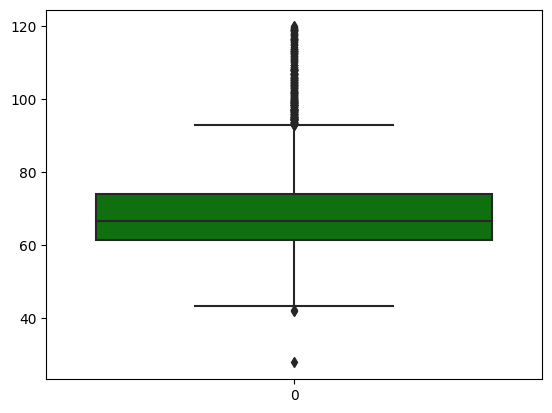

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

for i in gt.columns:
    print(i)
    sns.boxplot(gt[i],color = 'green')
    plt.show()

#### Inferences: About Skewness

    AH,TIT,TAT are left Skewed(negative-skewness)
    
    CO are Right Skewed (positive-skewness)
    
    AT,AP,NOX are normally distributed
    

{'whiskers': [<matplotlib.lines.Line2D at 0x7e948d710e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e948d711390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e948d710cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e948d7118d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e948d711b70>],
 'means': []}

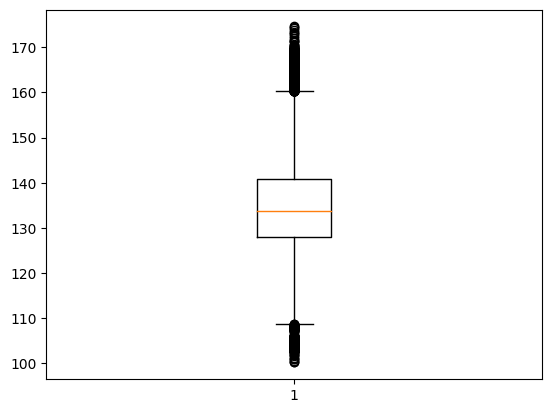

In [13]:
# Boxplot of Turbine Energy Yield (TEY)
plt.boxplot(gt['TEY'])

<Axes: >

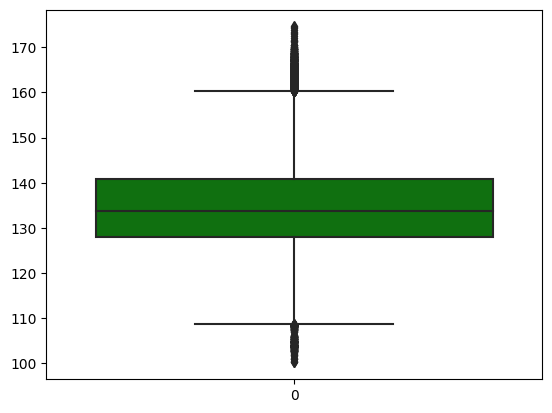

In [14]:
sns.boxplot(gt['TEY'], color = 'green')

In [15]:
#sns.set(rc={'figure.figsize': (20,20)})
#sns.boxplot(x="variable",y="value", data=pd.melt(gt))

Independent and Dependent variable

In [16]:
X = gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gt.loc[:,['TEY']]

###### CROSS VALIDATION TECHNIQUE

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [18]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [19]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [20]:
from tensorflow.keras import wrappers

In [21]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

<ipython-input-21-ae62adc6907d>:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.12 (0.09) MSE


In [22]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.276525 , -1.2703137, -1.2498593, ..., -1.2004068, -1.5305879,
       -1.6636024], dtype=float32)

###### Train-Test Split Model Validation Technique

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [24]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [25]:
prediction

array([ 0.10595089,  0.29952782,  1.1353081 , ...,  1.1457942 ,
        0.12108059, -0.8107458 ], dtype=float32)

In [26]:
X = gt.drop(columns = ['TEY'], axis = 1)
y = gt.iloc[:,7]

In [27]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [28]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([

                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(output_size)
                             ])

In [29]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [30]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 2s - loss: 2701.5627 - mean_squared_error: 2701.5627 - val_loss: 181.5088 - val_mean_squared_error: 181.5088 - 2s/epoch - 6ms/step
Epoch 2/100
381/381 - 1s - loss: 104.1100 - mean_squared_error: 104.1100 - val_loss: 80.9498 - val_mean_squared_error: 80.9498 - 649ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 49.4110 - mean_squared_error: 49.4110 - val_loss: 38.4891 - val_mean_squared_error: 38.4891 - 656ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 20.8723 - mean_squared_error: 20.8723 - val_loss: 13.3541 - val_mean_squared_error: 13.3541 - 652ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 8.7357 - mean_squared_error: 8.7357 - val_loss: 5.8131 - val_mean_squared_error: 5.8131 - 647ms/epoch - 2ms/step
Epoch 6/100
381/381 - 1s - loss: 4.5544 - mean_squared_error: 4.5544 - val_loss: 3.0742 - val_mean_squared_error: 3.0742 - 648ms/epoch - 2ms/step
Epoch 7/100
381/381 - 1s - loss: 2.6752 - mean_squared_error: 2.6752 - val_loss: 2.5852 - val_mean_squa

In [31]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.5900 - mean_squared_error: 0.5900


In [32]:
predictions = model.predict_on_batch(X_test_scaled)

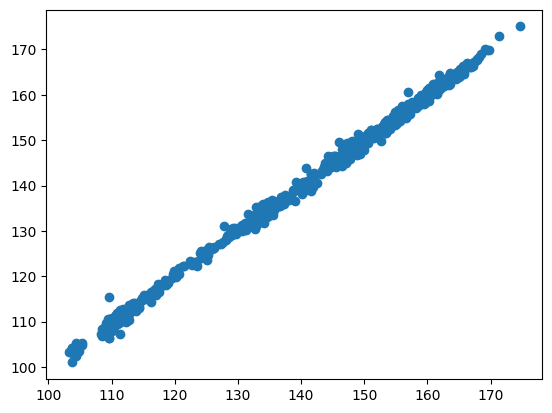

In [33]:
plt.scatter(y_test, predictions)

In [34]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.969269,0.378751
1,111.88,111.882881,0.002575
2,133.72,134.756775,0.775333
3,133.79,134.000931,0.157658
4,110.77,110.932495,0.146696
...,...,...,...
1499,132.85,132.544983,0.229595
1500,125.07,123.567703,1.201165
1501,160.95,161.636658,0.426628
1502,133.12,132.802246,0.238697


Results:
    
    Here we got the information about skweness and normally distributed using Boxplot of given dataset.
    
    By using TensorFlow, Prediction of Turbine Energy Yield (TEY) we can see error is going to decrease it means we got
    better model.